<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/CargaDeArchivo_Parcial_23_09_2022_DaversonA_CamiloG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daverson Arenas - 1020452795
Camilo Gómez - 1017139589

In [ ]:
import pandas as pd 
import numpy as np                                
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/Clase_5_Parcial/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
df.dropna(inplace = True)

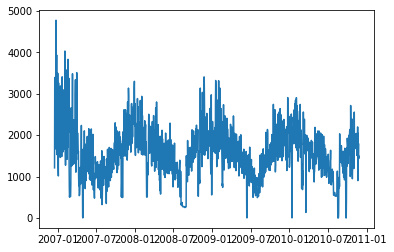

In [ ]:
df_new1 = df.groupby(pd.Grouper(freq='D')).sum()
plt.plot(df_new1['Global_active_power'])

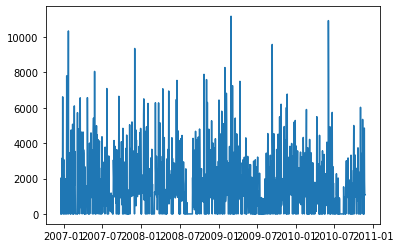

In [ ]:
df_new3 = df.groupby(pd.Grouper(freq='D')).sum()
plt.plot(df_new3['Sub_metering_1'])

In [ ]:
df_new3 = df.groupby(pd.Grouper(freq='D')).sum()
plt.plot(df_new3['Sub_metering_1'])

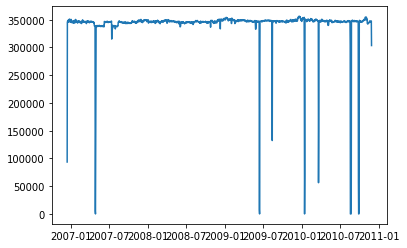

In [ ]:
df_new2 = df.groupby(pd.Grouper(freq='D')).sum()
plt.plot(df_new2['Voltage'])

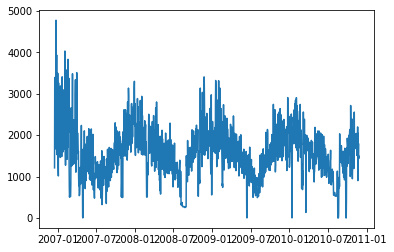

In [ ]:
plt.plot(newDf['Global_active_power'])

Se selecciona la señal 'Global_active_power', realmente podría ser cualquiera de ellas, excepto la de 'Voltage" que realmente tienen unos oultlaiers

In [ ]:
df_new = newDf['Global_reactive_power']
df_new

dt
2006-12-16     34.922
2006-12-17    226.006
2006-12-18    161.792
2006-12-19    150.942
2006-12-20    160.998
               ...   
2010-11-22    142.354
2010-11-23    137.450
2010-11-24    132.460
2010-11-25    116.128
2010-11-26    120.826
Freq: D, Name: Global_reactive_power, Length: 1442, dtype: float64

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [ ]:
def maFilter(x, N):   # N ventana de tiempo                        
  xTemp = np.zeros([len(x) + (N-1)])
  xTemp[(N-1):] = x
  y = np.zeros(len(x))
  
  for i in range(0, len(x)):
    y[i] = xTemp[i:i +N]. sum() / float(N)
  return y

In [ ]:
list2 = []
for i in df_new:
  list2.append(i)

In [ ]:
list2

In [ ]:
#Valor de la ventana. Este 7 significa 7 días. Vamos a hacerle un filtro por semana
window = 7
#Cases
df_avg = maFilter(newDf['Global_reactive_power'], window)

In [ ]:
newDf['filter'] = df_avg

In [ ]:
newDf

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,filter
dt,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,4.988857
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,37.275429
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,60.388571
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,81.951714
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,104.951429
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,145.769143
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,146.319429
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,144.968571


In [ ]:
df_avg

array([  4.98885714,  37.27542857,  60.38857143, ..., 144.96857143,
       132.10171429, 131.80142857])

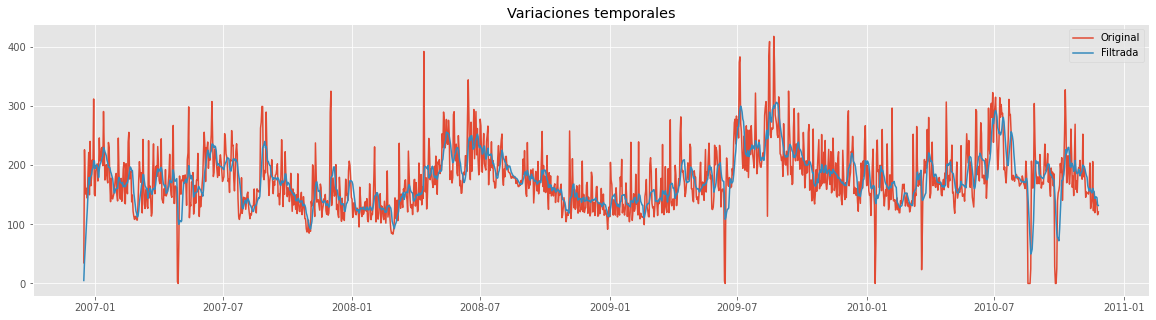

In [ ]:
with plt.style.context('ggplot'):
  plt.figure(figsize=(20,5))
  plt.plot(newDf['Global_reactive_power'] , label = "Original")
  plt.plot(newDf['filter'] ,  label = "Filtrada")

  plt.title("Variaciones temporales")
  plt.legend()

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#Función para graficar la media móvil
#La función rolling nos ayuda a cálcular la media móvil
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(10,5))
    plt.title("Media móvil\n Tamaño de la ventana = {}".format(window))
    plt.plot(rolling_mean, "g", label="Tendencia media móvil")

    # Graficar intervalos de confianza para valores suavizados
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Intervalos superior / Inferior")
        plt.plot(lower_bond, "r--")
        
        # Encontrar valores anormales
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Valor actual")
    plt.legend(loc="upper left")
    plt.grid(True)

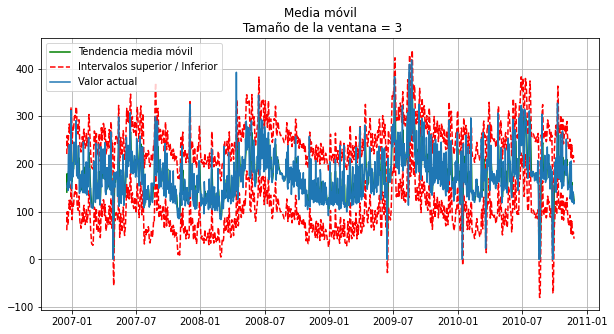

In [ ]:
window = 3
plotMovingAverage(newDf['Global_reactive_power'], window, plot_intervals=True)

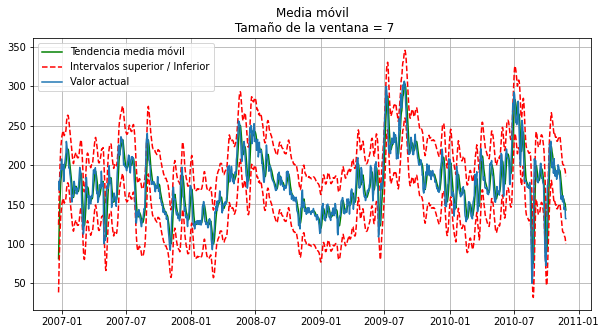

In [ ]:
window = 7
plotMovingAverage(newDf['filter'], window, plot_intervals=True)

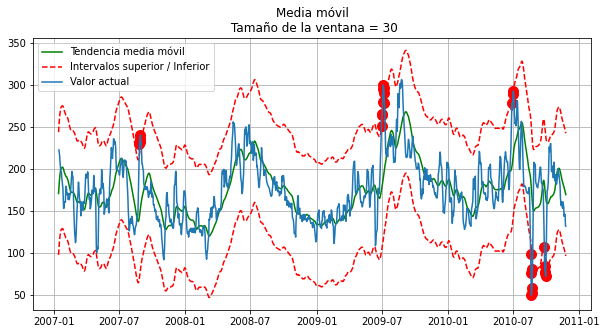

In [ ]:
plotMovingAverage(pd.DataFrame(newDf['filter']), 30, plot_intervals=True, plot_anomalies=True)

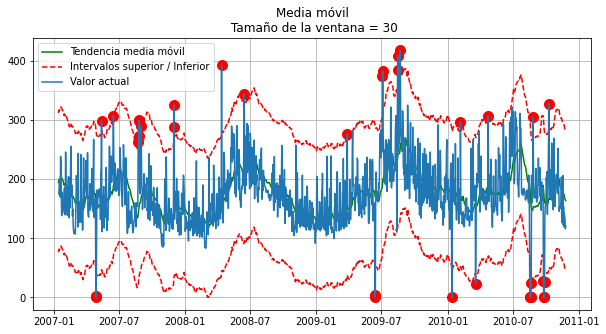

In [ ]:
plotMovingAverage(pd.DataFrame(newDf['Global_reactive_power']), 30, plot_intervals=True, plot_anomalies=True)

In [ ]:
#Método para suavisar una serie usuando suavizado exponencial
def exponential_smoothing(series, alpha):
    """
        Parámetro de suavizado alpha - float [0.0, 1.0]
        series: Seria de datos que vamos a suavizar
    """
    result = [series[0]] # El primer valor es el mismo de la serie
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
    Gráfica el suavizado exponencial con diferentes alphas        
    """
    plt.figure(figsize=(10, 5))
    plt.plot(series.values, "c", label = "Actual")
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Suavizado exponencial")
    plt.grid(True);

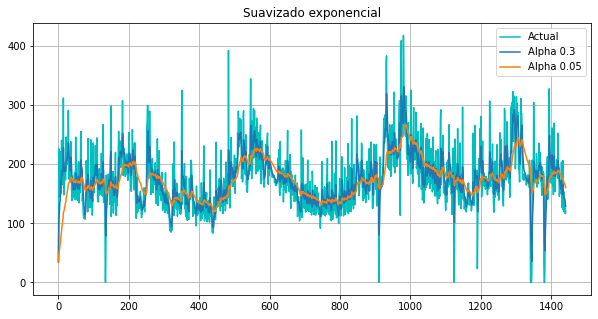

In [ ]:
plotExponentialSmoothing(newDf['Global_reactive_power'], [0.3, 0.05])

In [ ]:
pip install skforecast

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
#Ensablar el bosque
from skforecast.model_selection import grid_search_forecaster
#Encontrar los parametros óptimos del modelo

from joblib import dump, load # Para almacenar los modelos
import warnings

warnings.filterwarnings('ignore')

In [ ]:
##Ajuste de hyperparametros. Esta función nos devolvera una matrix con el mejor párametros
def modelParameters(data, steps): 
    #Definimos el data de entrenamiento. Le quitamos los últimos 30 días
    data_train = data[:-steps]
    #Definimos nuestro modelo
    forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 7)

    lags_grid = [5, 10, 15, 20]                           # ventana temporal

    param_grid = {'n_estimators': [50, 100, 500],         # número de árboles 
                  'max_depth': [3, 5, 10, 15]}

    #Con este código probamos todas la combinaciones posibles para obtener el mínimo error
    resultados_grid = grid_search_forecaster(
                            forecaster         = forecaster,
                            y                  = data_train['Global_active_power'],
                            param_grid         = param_grid,
                            lags_grid          = lags_grid,
                            steps              = steps,
                            refit              = True,
                            metric             = 'mean_squared_error',
                            initial_train_size = int(len(data_train)*0.5),
                            fixed_train_size   = False,
                            return_best        = True,
                            verbose            = False
                       )
    return resultados_grid

In [ ]:
#Función para predecir el módelo
def predictModel(data, steps, max_depth, n_estimators, lags): 
    #Se separan los datos de entrenamiento de los datos de test
    data_train = data[:-steps]
    data_test  = data[-steps:] 
    regressor = RandomForestRegressor(max_depth = max_depth, 
                                      n_estimators = n_estimators, random_state=123)
    
    forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = lags
             )

    forecaster.fit(y=data_train['Global_active_power'])
    predictions = forecaster.predict(steps = steps)
    
    dfPred = pd.DataFrame(predictions)
    #Fechas de nuestro datatest
    dfPred.index = pd.date_range(start=data_test.index.min(), end=data_test.index.max())

    dfPred['Real']  = data_test['Global_active_power'].values
    dfPred['Diference'] = np.abs((dfPred['Real'] - dfPred['pred']))
    print(mean_absolute_percentage_error(dfPred['Real'], dfPred['pred'] ), "%")
    
    return dfPred, forecaster

In [ ]:
def predGraph(dataTrain, dataTest, dataPred, zoom = 0):
    fig, ax = plt.subplots(figsize = (15, 5))
    dataTrain['Global_active_power'][zoom:].plot(ax = ax, label = 'train')
    dataTest['Global_active_power'].plot(ax = ax, label = 'test')
    dataPred['pred'].plot(ax = ax, label = 'predicciones')
    ax.legend();
    return

In [ ]:
steps = 30
result1 = modelParameters(newDf, steps)

Number of models compared: 48.


loop lags_grid: 100%|██████████████████████████████████████| 4/4 [38:40<00:00, 580.13s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 210305.53344318486



In [ ]:
#Este es el porcentaje de error!
steps = 30
max_depth = 10
n_estimators = 500
lags = 20
pred, model1 = predictModel(newDf, steps, max_depth, n_estimators, lags)

18.409164228075127 %


In [ ]:
#Ultimo dato en el tiempo. Con la fecha de ese dia
newDf.loc[newDf.index[-1]]

Global_active_power        1488.104
Global_reactive_power       120.826
Voltage                   303487.57
Global_intensity             6259.8
Sub_metering_1               1080.0
Sub_metering_2                385.0
Sub_metering_3               9989.0
filter                   131.801429
dates                           NaT
Name: 2010-11-26 00:00:00, dtype: object

In [ ]:
#Definimos las fechas que queremos usar para la estimación
new_Df = pd.DataFrame(pd.date_range(start='2010-11-27', end='2010-12-13'), columns = ['dates'])
new_Df = new_Df.set_index(['dates']) 

In [ ]:
new_Df

""
dates
2010-11-27
2010-11-28
2010-11-29
2010-11-30
2010-12-01
2010-12-02
2010-12-03
2010-12-04
2010-12-05


In [ ]:
#Hacemos las predicciones con las nuevas fechas usando el modelo
predictions = model1.predict(steps=17)
dfPred = pd.DataFrame(predictions)
dfPred.index = pd.date_range(start=new_Df.index.min(), end=new_Df.index.max()) 
dfPred.head()

,pred
2010-11-27,1372.024873
2010-11-28,1539.908945
2010-11-29,1798.618779
2010-11-30,1847.595854
2010-12-01,1821.953261


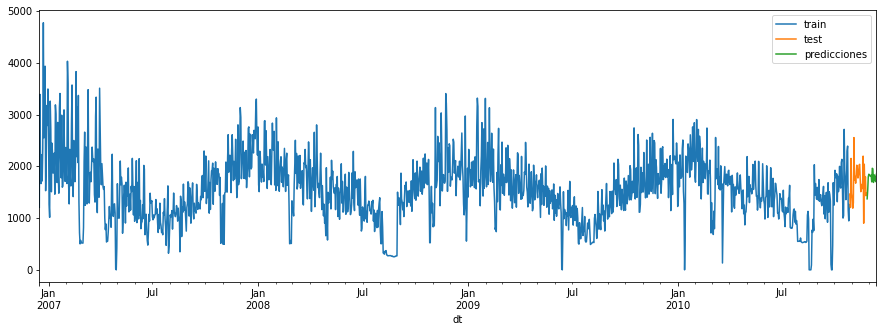

In [ ]:
#Graficamos la predicción, En naranja es lo que me tenia que dar y el verde es lo que me dio
predGraph(newDf[:-steps], newDf[-steps:], dfPred,0)

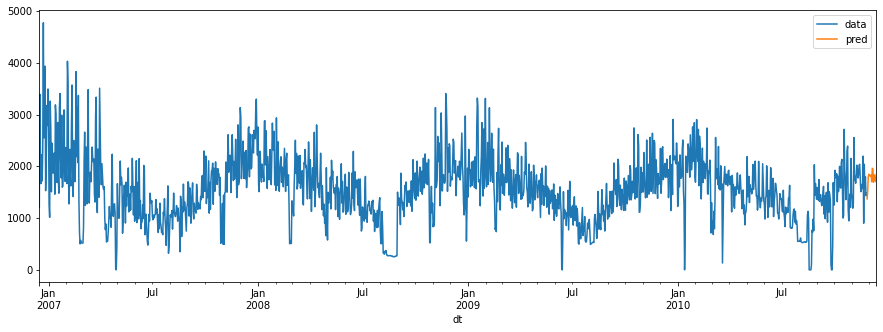

In [ ]:
#Miremos la tendencia futura, con los datos nuevos
fig, ax = plt.subplots(figsize = (15, 5))
newDf['Global_active_power'][:].plot(ax = ax, label = 'data')
dfPred['pred'].plot(ax = ax, label = 'pred')
ax.legend();